Artificial Neural networks(ANN)

In [1]:
#digits recognition is a classification example
# it is a multi-class classification- since we have 10  categories

In [2]:
import tensorflow as tf
tf.__version__
#Tensforflow version 2 and above has keras installed by default

'2.7.0'

In [3]:
from tensorflow import keras #importing tensorflow's keras library
#it is a deep learning library and uses the concept of neural networks
#keras is a wrapper which runs on top of tensorflow
#keras cannot run without tensorflow being installed

In [4]:
#Neural Networks, the aim is to get correct set of weights and bias values for best possible prediction
#ie.. less error and more accuracy

In [5]:
mnist=keras.datasets.mnist #we are importing mnist dataset from keras library
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show>

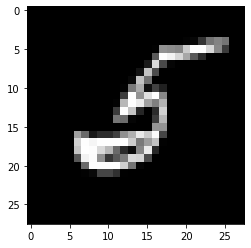

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1111],cmap='gray')
plt.show

In [9]:
y_train[1111]

5

In [10]:
x_train=x_train/255 #simplest way for normalizing an image
x_test=x_test/255


In [11]:
x_train[1111].max()

1.0

In [12]:
x_train[1111].min()

0.0

In [13]:
#define the neural netwrok architecture
model=keras.models.Sequential()
model.add(keras.layers.Flatten()) #input layer#we are flattening the image from 28*28 to 784
#ie..784 neurons are written in input layer as a straight line
model.add(keras.layers.Dense(512,input_shape=(28,28),activation='relu')) #any no. of neurons between 1 and 784
#here we have taken 2/3rd no. of ip layer neurons 2/3 of 784=512
model.add(keras.layers.Dense(10,activation='softmax')) #o/p layer, we add 10 neurons bcoz there are 10 categories

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,epochs=15)
#batch size=32 #32*1875 gives 60000 images

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1982 - accuracy: 0.9418
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0810 - accuracy: 0.9750
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0525 - accuracy: 0.9835
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - lo

In [16]:
model.get_weights()

[array([[-0.04476471,  0.06196406, -0.01713422, ..., -0.022202  ,
         -0.0578175 , -0.06597193],
        [-0.00074984,  0.0552029 ,  0.00472759, ...,  0.00119687,
          0.03995381,  0.04264395],
        [-0.04540213, -0.02444978, -0.0196372 , ...,  0.0245403 ,
          0.05022318,  0.00515159],
        ...,
        [ 0.02989149, -0.00209026, -0.00233089, ...,  0.0359308 ,
         -0.06510772,  0.02296331],
        [-0.02476592,  0.0553346 , -0.04029521, ...,  0.06446914,
          0.00802241,  0.06406055],
        [ 0.02308325,  0.05721658,  0.04432596, ..., -0.03315479,
         -0.01928738,  0.01183487]], dtype=float32),
 array([ 1.04400583e-01, -1.80506974e-01,  8.64702277e-04,  3.76161039e-02,
         1.09595902e-01, -4.85546654e-03, -1.01211570e-01,  3.50163877e-02,
        -3.70133296e-02, -7.18035623e-02, -4.92578633e-02, -1.12713099e-01,
        -8.44468996e-02, -5.45520820e-02, -6.26358762e-02,  1.49887234e-01,
         3.30248773e-02, -7.58361667e-02,  9.87978205e

In [19]:
import numpy as np
y_pred=np.argmax(model.predict(x_test),axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9824

In [22]:
model.save("model_digit.hdf5")